Customer Segmentation Analysis

Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Data Collection

In [35]:
df = pd.read_csv("ifood_df.csv") 
print("Data Loaded Successfully!")
print(df.head())


Data Loaded Successfully!
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n

Data Exploration

In [36]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Data Cleaning

In [37]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

RFM

In [38]:
import pandas as pd


df = pd.read_csv("ifood_df.csv")  


df['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Monetary'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + \
                 df['MntSweetProducts'] + df['MntGoldProds']

rfm = df[['Customer_Days', 'Recency', 'Frequency', 'Monetary']].copy()

rfm.columns = ['Customer_Days', 'Recency', 'Frequency', 'Monetary']


rfm = rfm.set_index('Customer_Days').reset_index()


print(rfm.head())


   Customer_Days  Recency  Frequency  Monetary
0           2822       58         22      1617
1           2272       38          4        27
2           2471       26         20       776
3           2298       26          6        53
4           2320       94         14       422


Visualization

Scatter Plots (Recency vs Frequency)

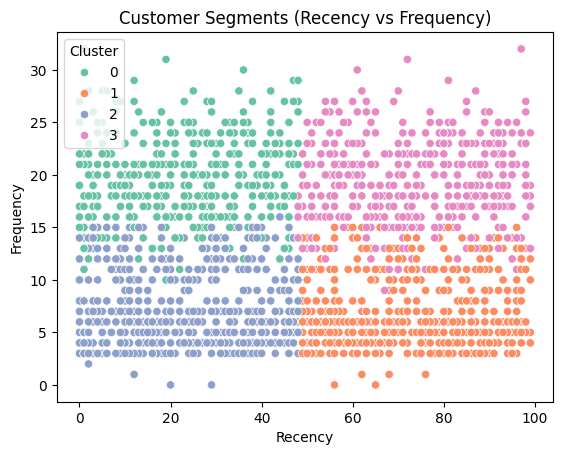

In [42]:



sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='Set2')
plt.title("Customer Segments (Recency vs Frequency)")
plt.show()



K-Means Clustering

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(scaled)


Cluster Distribution

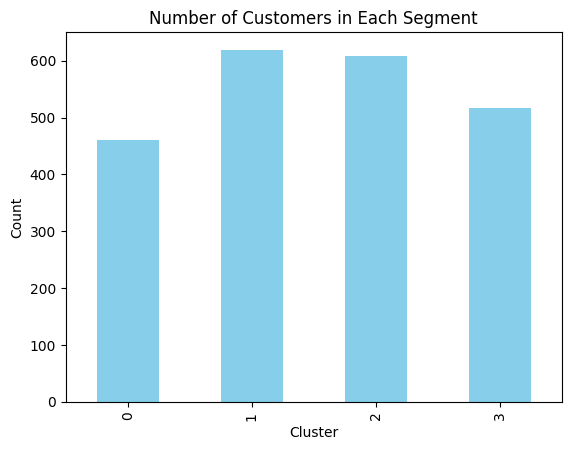

In [ ]:
rfm['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Number of Customers in Each Segment")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


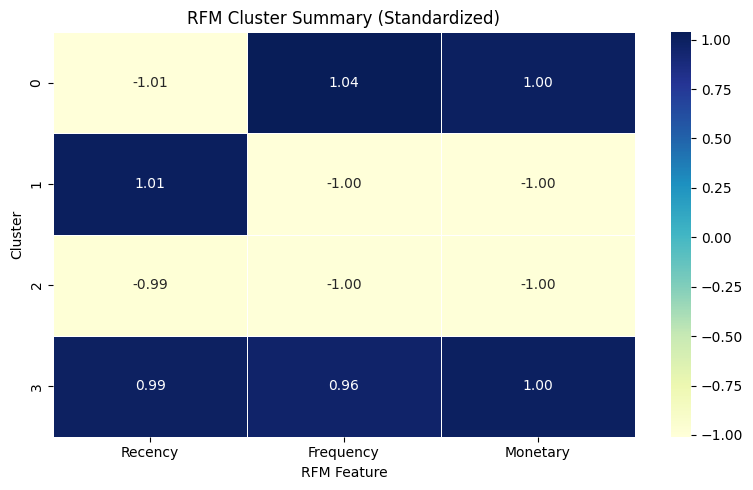

In [ ]:


cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

scaler = StandardScaler()
cluster_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_summary),
    index=cluster_summary.index,
    columns=cluster_summary.columns
)

plt.figure(figsize=(8, 5))
sns.heatmap(cluster_scaled, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("RFM Cluster Summary (Standardized)")
plt.xlabel("RFM Feature")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


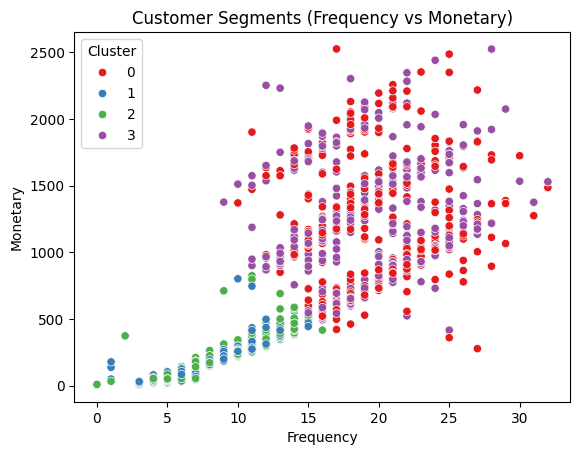

In [ ]:
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='Set1')
plt.title('Customer Segments (Frequency vs Monetary)')
plt.show()


In [ ]:
rfm = rfm.merge(df[['Income', 'NumWebPurchases']], left_index=True, right_index=True)


In [ ]:
for i in sorted(rfm['Cluster'].unique()):
    print(f"\nCluster {i} Insights:")
    temp = rfm[rfm['Cluster'] == i]
    
    print(f"Avg Income: {temp['Income'].mean():.2f}")
    print(f"Avg Total Spending: {temp['Monetary'].mean():.2f}")
    print(f"Avg Web Purchases: {temp['NumWebPurchases'].mean():.2f}")
    print(f"Avg Recency: {temp['Recency'].mean():.2f}")
    print(f"Customers in this segment: {temp.shape[0]}")



Cluster 0 Insights:
Avg Income: 70049.03
Avg Total Spending: 1183.19
Avg Web Purchases: 6.13
Avg Recency: 23.00
Customers in this segment: 461

Cluster 1 Insights:
Avg Income: 37399.81
Avg Total Spending: 146.98
Avg Web Purchases: 2.62
Avg Recency: 73.42
Customers in this segment: 619

Cluster 2 Insights:
Avg Income: 37168.90
Avg Total Spending: 151.95
Avg Web Purchases: 2.61
Avg Recency: 23.46
Customers in this segment: 609

Cluster 3 Insights:
Avg Income: 69278.63
Avg Total Spending: 1180.38
Avg Web Purchases: 5.83
Avg Recency: 73.12
Customers in this segment: 516
